In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')   #한글처리
import seaborn as sns
import pandas as pd

In [2]:
df_I10= pd.read_csv('../datasets/Join_Collection_NSC2_BND_M20.csv')
df_I10.columns

Index(['Unnamed: 0', 'MDCARE_STRT_DT', 'BTH_YYYY', 'OFIJ_TYPE',
       'MCARE_SUBJ_CD', 'OPRTN_YN', 'ED_RC_TOT_AMT'],
      dtype='object')

In [3]:
df_I10_h = df_I10[['MDCARE_STRT_DT','BTH_YYYY','OPRTN_YN','OFIJ_TYPE']]
df_I10_h  #분석할 컬럼들만 추출

,MDCARE_STRT_DT,BTH_YYYY,OPRTN_YN,OFIJ_TYPE
0,20020710,1921LE,0,0
1,20020805,1921LE,0,0
2,20021017,1921LE,0,0
3,20071008,1921LE,0,0
4,20040312,1921LE,0,0
...,...,...,...,...
4624,20051220,2005,0,0
4625,20050614,2005,0,0
4626,20050716,2005,0,0
4627,20060123,2005,0,0


### 상관관계 확인
- 궁금한 점 : 입원기간에 영향을 미치는 컬럼들
- 목표 변수 : '입원기간' -> 분포 : 언발란스
    - 연속형일 경우 : 정규화 확인
    - 범주형일 경우 : 밸런스 여부 확인
- 설명 변수 설정 : 
    - '과거수술횟수' : 과거 수술 횟수가 많을 수록 입원 기간이 길어짐
    - '연령' : : 상대적으로 나이 많으면 발생률이 높은 것으로 보임.
    - '환자통증정도' : 통증정도가 크면 입원기간이 길어짐
    - '통증기간(월)' : 통증기간은 보통 2달이제일 많았으며 분포는 1-2사이가 가장 많았다. 입원기간과 관계가 적다.
    - '수술시간' : 수술시간은 보통 62분에 중간값을 가지고 있었다.
    - '디스크단면적' : 단면적 크기에 따라 입원기간에 영향을 줌

### EDA 전략
- 목표 변수와 각 설명 변수의 관계 확인
- 해당 변수(목표와 설명) 선택

In [4]:
df_I10_h.corr()

C:\Users\04-04\AppData\Local\Temp\ipykernel_7384\2127345157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_I10_h.corr()


,MDCARE_STRT_DT,OPRTN_YN
MDCARE_STRT_DT,1.000000,-0.006314
OPRTN_YN,-0.006314,1.000000


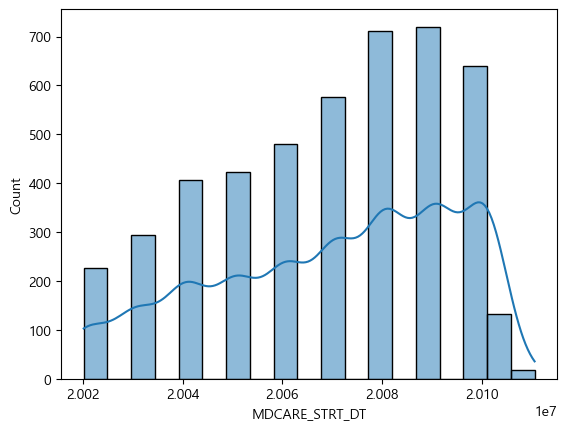

In [5]:
sns.histplot(data=df_I10_h , x='MDCARE_STRT_DT',kde=True)
plt.show()

In [6]:
df_I10_h['MDCARE_STRT_DT'].value_counts()

20091228    9
20091126    9
20101227    9
20090622    8
20081223    8
           ..
20040218    1
20040403    1
20041108    1
20041203    1
20050716    1
Name: MDCARE_STRT_DT, Length: 2138, dtype: int64

#### 범주형과 연속형(순서형)으로 dtype변형
- BTH_YYYY(출생년도) object -> int형
    - 1920LE를 int형으로 바꾸기 위해서는 LE를 제거하고 '1921'값을 이용해서 분석해야 하는데 그건 정확한 분석이라고 생각하지 않아우선, 1920LE사람들을 제외하고 분석함
- OPRTN_YN(공상 등 구분) int형 -> object

In [7]:
df_I10_h.info()   # Dtype 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MDCARE_STRT_DT  4629 non-null   int64 
 1   BTH_YYYY        4629 non-null   object
 2   OPRTN_YN        4629 non-null   int64 
 3   OFIJ_TYPE       4522 non-null   object
dtypes: int64(2), object(2)
memory usage: 144.8+ KB


In [8]:
df_I10_h = df_I10_h[~df_I10_h["BTH_YYYY"].str.contains("1921LE", case=False)] #LE 있는 데이터 삭제

In [9]:
df_I10_h

,MDCARE_STRT_DT,BTH_YYYY,OPRTN_YN,OFIJ_TYPE
11,20060612,1926,0,0
12,20081013,1926,0,0
13,20081216,1926,0,0
14,20081002,1926,0,0
15,20081116,1926,0,0
...,...,...,...,...
4624,20051220,2005,0,0
4625,20050614,2005,0,0
4626,20050716,2005,0,0
4627,20060123,2005,0,0


In [12]:
df_I10_h["BTH_YYYY"] = df_I10_h["BTH_YYYY"].astype(int)

C:\Users\04-04\AppData\Local\Temp\ipykernel_7384\1182345637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_I10_h["BTH_YYYY"] = df_I10_h["BTH_YYYY"].astype(int)


In [13]:
df_I10_h["OPRTN_YN"] = df_I10_h["OPRTN_YN"].astype(object)

C:\Users\04-04\AppData\Local\Temp\ipykernel_7384\1581453411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_I10_h["OPRTN_YN"] = df_I10_h["OPRTN_YN"].astype(object)


In [14]:
df_I10_h.info()  # Dtype 변경확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4618 entries, 11 to 4628
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   MDCARE_STRT_DT  4618 non-null   int64 
 1   BTH_YYYY        4618 non-null   int32 
 2   OPRTN_YN        4618 non-null   object
 3   OFIJ_TYPE       4511 non-null   object
dtypes: int32(1), int64(1), object(2)
memory usage: 162.4+ KB


### 시각화 확인


#### 변수간에 상관성 확인
- 목표 변수는 정규화 여부 판단
- 목표 변수와 각 설명 변수 간에 관계 확인

In [15]:
df_I10_h.describe()  #연속형 확인

,MDCARE_STRT_DT,BTH_YYYY
count,4.618000e+03,4618.000000
mean,2.007002e+07,1969.825682
std,2.412561e+04,21.908629
min,2.002010e+07,1926.000000
25%,2.005081e+07,1954.000000
50%,2.007110e+07,1968.000000
75%,2.009070e+07,1991.000000
max,2.011062e+07,2005.000000


In [16]:
df_I10_h.describe().columns.to_list() #연속형 분포도 확인

['MDCARE_STRT_DT', 'BTH_YYYY']

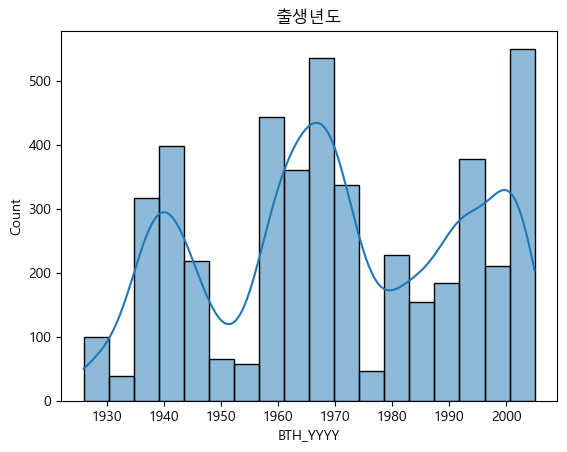

In [17]:
sns.histplot(data=df_I10_h, x='BTH_YYYY', kde=True)
plt.title('출생년도')
plt.show() 

In [18]:
df_I10_h.describe(include=object).columns.to_list()

['OPRTN_YN', 'OFIJ_TYPE']

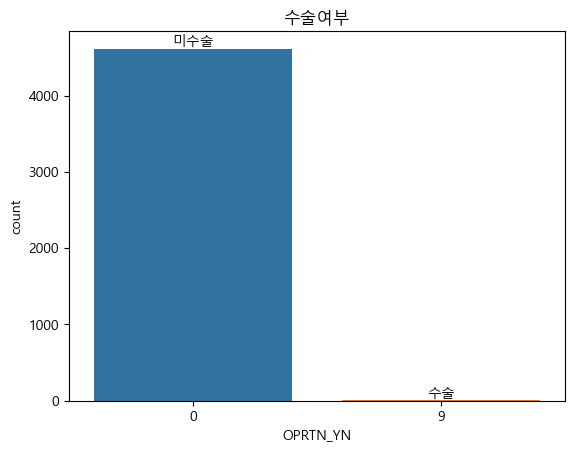

In [25]:
sns.countplot(data=df_I10_h, x='OPRTN_YN')
plt.title('수술여부')
plt.text(0, df_I10_h['OPRTN_YN'].value_counts().loc[0], '미수술', ha='center', va='bottom', fontsize=10)
plt.text(1, df_I10_h['OPRTN_YN'].value_counts().loc[9], '수술', ha='center', va='bottom', fontsize=10)
plt.show()

In [26]:
df_I10_h['OPRTN_YN'].value_counts()

0    4615
9       3
Name: OPRTN_YN, dtype: int64

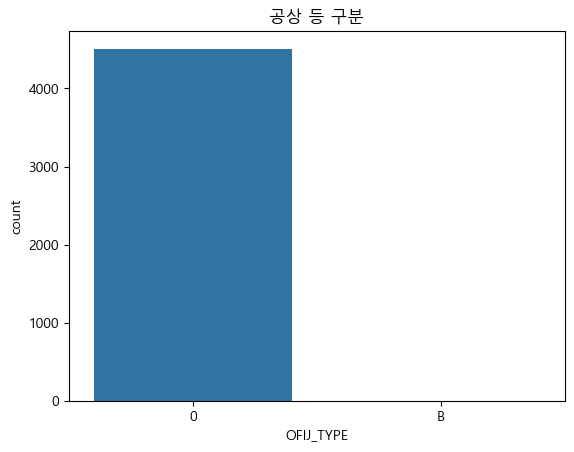

In [36]:
sns.countplot(data=df_I10_h, x='OFIJ_TYPE')
plt.title('공상 등 구분')
plt.show()

In [37]:
df_I10_h['OFIJ_TYPE'].value_counts()   # 0: 해당없음 B : 보훈병원의 국비일반(상이처, 무자격자) 또는 국비보험(급여) 1차

0    4509
B       2
Name: OFIJ_TYPE, dtype: int64

#### 연속형 / 범주형

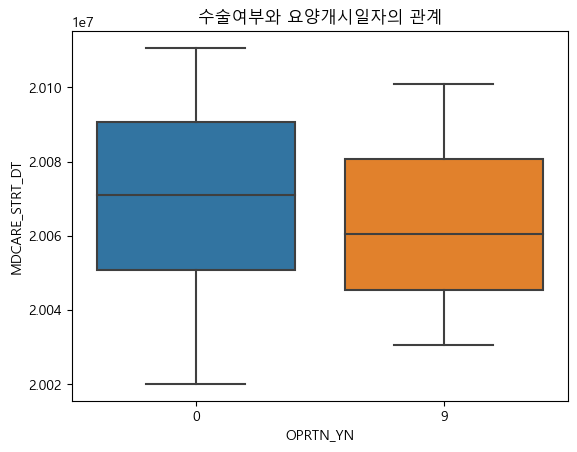

In [57]:
sns.boxplot(data=df_I10_h, x='OPRTN_YN', y='MDCARE_STRT_DT')
plt.title('수술여부와 요양개시일자의 관계')
plt.show()

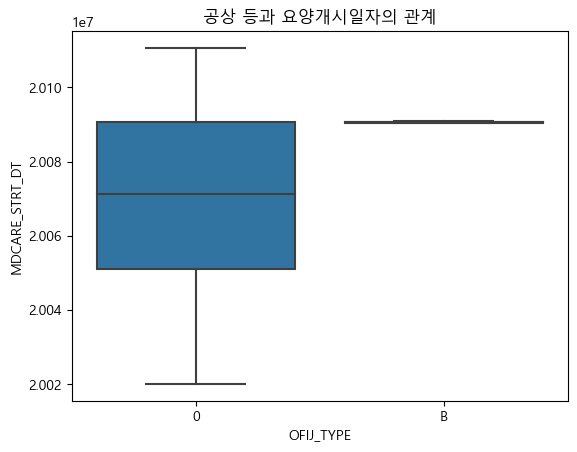

In [56]:
sns.boxplot(data=df_I10_h, x='OFIJ_TYPE', y='MDCARE_STRT_DT')
plt.title('공상 등과 요양개시일자의 관계')
plt.show()

#### 연속형 / 연속형

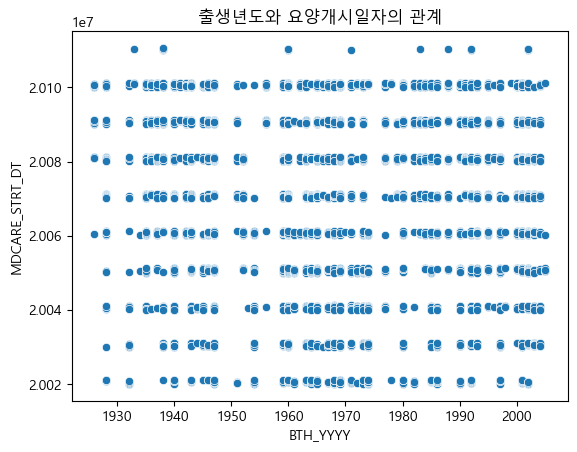

In [49]:
sns.scatterplot(data=df_I10_h, x='BTH_YYYY', y='MDCARE_STRT_DT')
plt.xlabel('BTH_YYYY')
plt.ylabel('MDCARE_STRT_DT')
plt.title('출생년도와 요양개시일자의 관계')
plt.show()